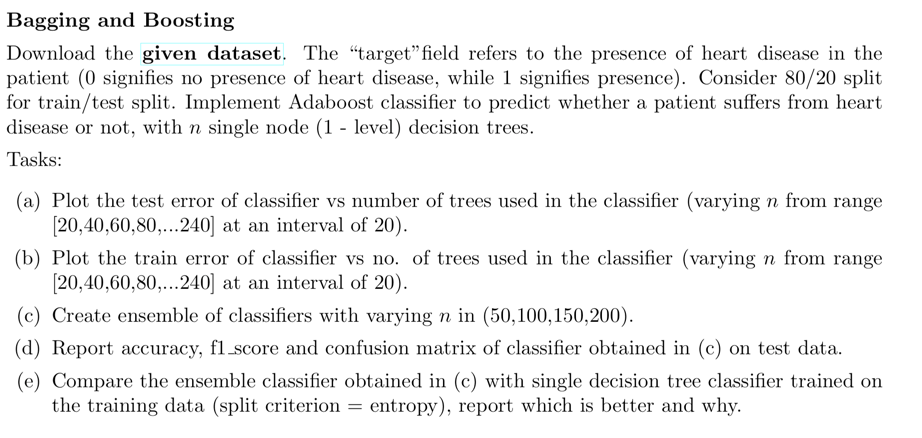

In [1]:
from IPython.display import Image
Image(filename='question2.png')

In [2]:
import pandas as pd
import numpy as np
import operator

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


## Loading the dataset

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = df.drop("target", axis=1)
Y = df["target"]

In [6]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
Y.isnull().sum()

0

## Splitting the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [9]:
X_test.shape

(61, 13)

In [10]:
y_test.shape

(61,)

In [11]:
X_train.shape

(242, 13)

In [12]:
y_train.shape

(242,)

In [13]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


## Training with KNN

In [14]:
def hyper_combination_generator(no_trees):
    
    # learning rate 
    learning_rate = 1

    hyper_prams_combi = []
    for n in no_trees:
        _ = n, learning_rate
        hyper_prams_combi.append(_)
        
    return hyper_prams_combi

In [15]:
def all_clf(hyper_prams):
    all_clf_dict = {}
    for h_pram in hyper_prams:
        name = f"clfs_trees_{h_pram[0]}"
        n_estimators, learning_rate = h_pram[0], h_pram[1]
        all_clf_dict[name] = AdaBoostClassifier(n_estimators=n_estimators,
                                                learning_rate=learning_rate,
                                                random_state=42)
    
    return all_clf_dict

In [16]:
def clf_fit(clfs, X_train, y_train):
    for clf in clfs.values():
        clf.fit(X_train, y_train)
    
    return clfs

In [17]:
def clf_preditions(data, all_clf_dict):
    clf_pred = {}
    for c in all_clf_dict:
        clf_pred[c] = all_clf_dict[c].predict(data)
    
    return clf_pred

In [18]:
def clf_accuracy_score(y_true, clf_preds):
    clf_accuracy_score = {}
    for c in clf_preds:
        clf_accuracy_score[c] = accuracy_score(clf_preds[c], y_true)
    
    return clf_accuracy_score

In [19]:
def clf_error_score(clf_accuracy_score):
    
    clf_error_score = {clf: 1- clf_accuracy_score[clf] for clf in clf_accuracy_score.keys()}
    
    return clf_error_score

In [20]:
def clf_confusion_matrix(y_true, clf_preds):
    clf_cms = {}
    for c in clf_preds:
        clf_cms[c] = confusion_matrix(clf_preds[c], y_true)
    return clf_cms

In [21]:
def clf_f1_score(y_true, clf_preds):
    clf_f1s = {}
    for c in clf_preds:
        clf_f1s[c] = f1_score(clf_preds[c], y_true)
    return clf_f1s

## PART I

### Training the model

In [22]:
# number of trees used in the classifier 
no_trees = range(20, 260, 20)

hyper_prams = hyper_combination_generator(no_trees)
all_clf_dict = all_clf(hyper_prams)
all_clf_dict = clf_fit(all_clf_dict, X_train, y_train)

In [23]:
all_clf_dict

{'clfs_trees_20': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=20, random_state=42),
 'clfs_trees_40': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=40, random_state=42),
 'clfs_trees_60': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=60, random_state=42),
 'clfs_trees_80': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=80, random_state=42),
 'clfs_trees_100': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=100, random_state=42),
 'clfs_trees_120': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                    n_estimators=120, random_state=42),
 'clfs_trees_140': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_r

**(a) Plot the `TEST` error of classifier vs number of trees used in the classifier (varying n from range [20,40,60,80,...240] at an interval of 20).**

In [24]:
clf_preds_test = clf_preditions(X_test, all_clf_dict)
clf_accuracy_score_test = clf_accuracy_score(y_test, clf_preds_test)
clf_error_score_test = clf_error_score(clf_accuracy_score_test)

In [25]:
clf_error_score_test

{'clfs_trees_20': 0.16393442622950816,
 'clfs_trees_40': 0.2295081967213115,
 'clfs_trees_60': 0.19672131147540983,
 'clfs_trees_80': 0.24590163934426235,
 'clfs_trees_100': 0.2295081967213115,
 'clfs_trees_120': 0.24590163934426235,
 'clfs_trees_140': 0.24590163934426235,
 'clfs_trees_160': 0.24590163934426235,
 'clfs_trees_180': 0.24590163934426235,
 'clfs_trees_200': 0.24590163934426235,
 'clfs_trees_220': 0.2786885245901639,
 'clfs_trees_240': 0.24590163934426235}

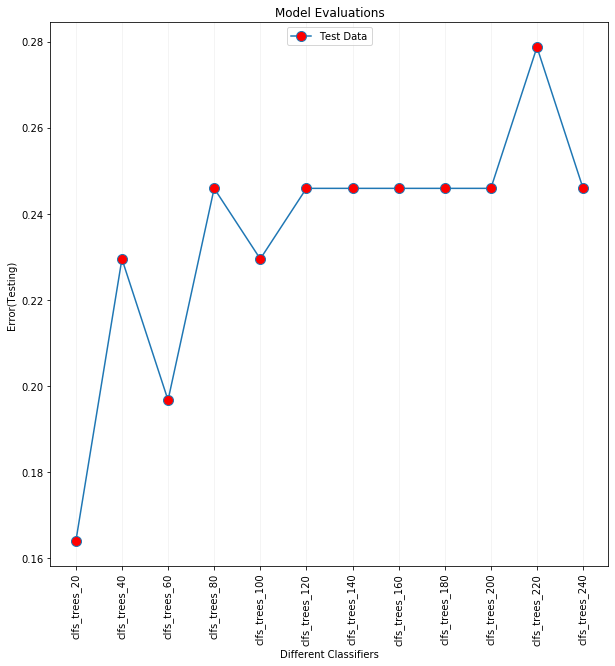

In [26]:
x = list(clf_error_score_test.keys())
y = list(clf_error_score_test.values())

plt.figure(figsize=(10,10))

plt.plot(x, y, label="Test Data", marker='o', markerfacecolor='red', markersize=10)

plt.xlabel('Different Classifiers')
plt.ylabel('Error(Testing)')
plt.title('Model Evaluations')
plt.grid(axis='x', color='0.95')
plt.legend(loc='upper center')
plt.xticks(rotation=90)

plt.show()

**(b) Plot the `TRAIN` error of classifier vs no. of trees used in the classifier (varying n from range [20,40,60,80,...240] at an interval of 20).**

In [27]:
clf_preds_train = clf_preditions(X_train, all_clf_dict)
clf_accuracy_score_train = clf_accuracy_score(y_train, clf_preds_train)
clf_error_score_train = clf_error_score(clf_accuracy_score_train)

In [28]:
clf_error_score_train

{'clfs_trees_20': 0.1198347107438017,
 'clfs_trees_40': 0.07851239669421484,
 'clfs_trees_60': 0.05785123966942152,
 'clfs_trees_80': 0.06198347107438018,
 'clfs_trees_100': 0.037190082644628086,
 'clfs_trees_120': 0.02892561983471076,
 'clfs_trees_140': 0.016528925619834656,
 'clfs_trees_160': 0.008264462809917328,
 'clfs_trees_180': 0.004132231404958664,
 'clfs_trees_200': 0.004132231404958664,
 'clfs_trees_220': 0.004132231404958664,
 'clfs_trees_240': 0.004132231404958664}

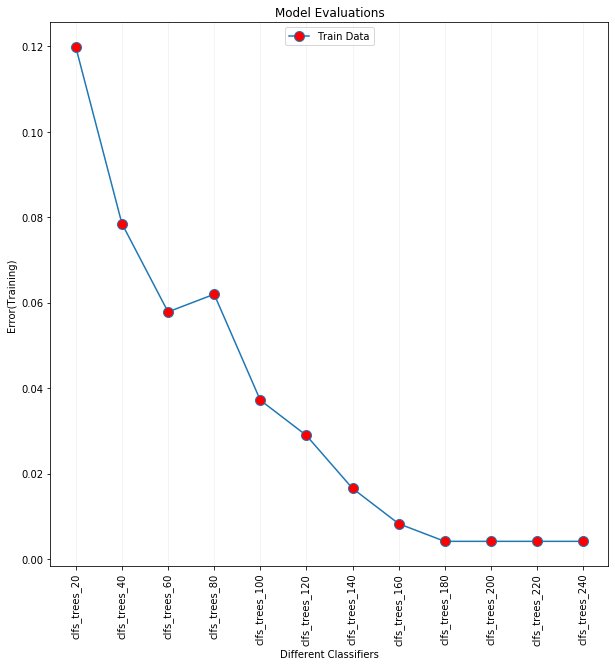

In [29]:
x = list(clf_error_score_train.keys())
y = list(clf_error_score_train.values())
plt.figure(figsize=(10,10))

plt.plot(x, y, label="Train Data", marker='o', markerfacecolor='red', markersize=10)

plt.xlabel('Different Classifiers')
plt.ylabel('Error(Training)')
plt.title('Model Evaluations')
plt.grid(axis='x', color='0.95')
plt.legend(loc='upper center')
plt.xticks(rotation=90)

plt.show()

**(c) Create ensemble of classifiers with varying n in (50,100,150,200).**

In [30]:
# number of trees used in the classifier 
no_trees = [50,100,150,200]
hyper_prams = hyper_combination_generator(no_trees)
all_clf_dict = all_clf(hyper_prams)

### Voting = `HARD`

In [31]:
collection_of_all_clf = list(all_clf_dict.items())
eclf1 = VotingClassifier(estimators=collection_of_all_clf, voting='hard')

In [32]:
eclf1 = eclf1.fit(X_train, y_train)
eclf1_preds = eclf1.predict(X_test)

In [33]:
print(classification_report(y_test, eclf1_preds))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [34]:
cm = confusion_matrix(y_test, eclf1_preds)
f1 = f1_score(y_test, eclf1_preds)
accuracy = accuracy_score(y_test, eclf1_preds)

In [35]:
print(f"Accuracy : {accuracy}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix : \n{cm}")

Accuracy : 0.7704918032786885
F1 Score : 0.7666666666666666
Confusion Matrix : 
[[24  5]
 [ 9 23]]


**(e) Compare the ensemble classifier obtained in (c) with single decision tree classifier trained on the training data (split criterion = entropy), report which is better and why.**

In [36]:
clf_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [37]:
clf_tree = clf_tree.fit(X_train, y_train)
dt_preds = clf_tree.predict(X_test)

In [38]:
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [39]:
cm = confusion_matrix(y_test, dt_preds)
f1 = f1_score(y_test, dt_preds)
accuracy = accuracy_score(y_test, dt_preds)

In [40]:
print(f"Accuracy : {accuracy}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix : \n{cm}")

Accuracy : 0.819672131147541
F1 Score : 0.8135593220338982
Confusion Matrix : 
[[26  3]
 [ 8 24]]
